In [360]:
pwd

'/media/permil/bcaab73e-b0b6-4c6e-bf63-b6153601ec68/python'

In [361]:
import pandas as pd

In [362]:
cases = pd.read_csv("Data/1307.1/data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [363]:
cases.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [364]:
cases.dtypes

report_date          object
location             object
location_type        object
data_field           object
data_field_code      object
time_period         float64
time_period_type    float64
value                object
unit                 object
dtype: object

In [365]:
cases.columns

Index(['report_date', 'location', 'location_type', 'data_field',
       'data_field_code', 'time_period', 'time_period_type', 'value', 'unit'],
      dtype='object')

In [366]:
cases['time_period_type'].value_counts()

Series([], Name: time_period_type, dtype: int64)

In [367]:
#missing records
for x in cases.columns:
    missingR = len(cases[cases[x].isnull()])
    totalR = len(cases)
    print("{} : {}/{} - {}".format(x, missingR, totalR, round((missingR*100)/totalR, 3)))

report_date : 7/107619 - 0.007
location : 7/107619 - 0.007
location_type : 7/107619 - 0.007
data_field : 7/107619 - 0.007
data_field_code : 7/107619 - 0.007
time_period : 107619/107619 - 100.0
time_period_type : 107619/107619 - 100.0
value : 138/107619 - 0.128
unit : 7/107619 - 0.007


In [245]:
##time_period and time_period_type is blank

In [368]:
cases = cases.drop(columns=["time_period", "time_period_type"])

In [369]:
cases[cases['value'].isnull()].head()

,report_date,location,location_type,data_field,data_field_code,value,unit
2018,2016-02-13,Brazil-Amapa,state,microcephaly_under_investigation,BR0001,NaN,cases
2019,2016-02-13,Brazil-Amazonas,state,microcephaly_under_investigation,BR0001,NaN,cases
2045,2016-02-13,Brazil-Amapa,state,microcephaly_confirmed,BR0002,NaN,cases
2046,2016-02-13,Brazil-Amazonas,state,microcephaly_confirmed,BR0002,NaN,cases
2072,2016-02-13,Brazil-Amapa,state,microcephaly_not,BR0003,NaN,cases


In [370]:
cases = cases[cases['value'].isnull() == False]

In [371]:
cases.shape

(107481, 7)

In [372]:
#missing records
for x in cases.columns:
    missingR = len(cases[cases[x].isnull()])
    totalR = len(cases)
    print("{} : {}/{} - {}".format(x, missingR, totalR, round((missingR*100)/totalR, 3)))

report_date : 0/107481 - 0.0
location : 0/107481 - 0.0
location_type : 0/107481 - 0.0
data_field : 0/107481 - 0.0
data_field_code : 0/107481 - 0.0
value : 0/107481 - 0.0
unit : 0/107481 - 0.0


In [373]:
cases["report_date"].unique()
#cannot be used as index

array(['2016-03-19', '2016-03-26', '2016-04-02', '2016-04-09',
       '2016-04-16', '2016-04-29', '2016-05-07', '2016-05-14',
       '2016-05-22', '2016-05-30', '2016-06-06', '2016-06-13',
       '2016-06-18', '2016-06-26', '2016-02-13', '2016-02-20',
       '2016-02-27', '2016-03-05', '2016-03-12', '2016-04-23',
       '2016-04-30', '2016-05-21', '2016-05-28', '2016-06-04',
       '2016-06-11', '2016-06-25', '2016-07-02', '2016-01-09',
       '2016-01-16', '2016-01-23', '2016-01-30', '2016-02-06',
       '2016-03-30', '2016-04-06', '2016-04-13', '2016-04-20',
       '2016-04-27', '2016-05-04', '2016-05-18', '2016-05-25',
       '2016-06-01', '2016-06-15', '2016-06-22', '2016-06-29',
       '2015-11-28', '2015-12-05', '2015-12-12', '2015-12-19',
       '2015-12-27', '2015-12-09', '2015-12-16', '2015-12-23',
       '2015-12-29', '2016-01-14', '2016-01-19', '2016-01-26',
       '2016-02-02', '2016-02-09', '2016-02-16', '2016-02-23',
       '2016-03-01', '2016-03-08', '2016-03-15', '2016-

In [ ]:
#replace _ in dates

In [374]:
def replace(x):
    #if x.find("_") != -1:
    #    x = x.replace("_", "-")
    #    return x
    x.replace("_", "-")
    return x

#replace("2014-04_14")
cases['report_date'] = cases['report_date'].apply(replace)

In [375]:
type(cases['report_date'][3])

str

In [380]:
cases['report_date'] = cases['report_date'].str.replace('_','-')

In [381]:
cases[cases['report_date'].str.find("_") != -1]

,report_date,location,location_type,data_field,data_field_code,value,unit


In [ ]:
#converting type of report date

In [382]:
cases['report_date'] = pd.to_datetime(cases['report_date'])

In [ ]:
pd.to_datetime(cases['report_date'])

In [383]:
cases.dtypes

report_date        datetime64[ns]
location                   object
location_type              object
data_field                 object
data_field_code            object
value                      object
unit                       object
dtype: object

In [ ]:
#Converting value datatype to int

In [384]:
cases = cases[cases['value'].str.find("*")==-1]

In [385]:
cases['value'] = pd.to_numeric(cases['value'])

In [386]:
cases.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


In [387]:
cases.dtypes

report_date        datetime64[ns]
location                   object
location_type              object
data_field                 object
data_field_code            object
value                       int64
unit                       object
dtype: object

In [ ]:
#Rough Query

In [388]:
cases.query("data_field_code == 'AR0005' & location == 'Argentina-Catamarca'")

,report_date,location,location_type,data_field,data_field_code,value,unit
16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,14,cases
160,2016-03-26,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
304,2016-04-02,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
448,2016-04-09,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
592,2016-04-16,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
736,2016-04-29,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
880,2016-05-07,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,cases
1024,2016-05-14,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
1168,2016-05-22,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,cases
1312,2016-05-30,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases


In [389]:
cases.query("data_field_code == 'AR0005' & location == 'Argentina-Catamarca'")[['report_date','value']].plot(style=".-")

ValueError: view limit minimum -36792.35 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f3eac5a8510> (for post_execute):


ValueError: view limit minimum -36792.35 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [390]:
cases.query("location == 'Argentina-Catamarca'")

,report_date,location,location_type,data_field,data_field_code,value,unit
12,2016-03-19,Argentina-Catamarca,province,cumulative_confirmed_local_cases,AR0001,0,cases
13,2016-03-19,Argentina-Catamarca,province,cumulative_probable_local_cases,AR0002,0,cases
14,2016-03-19,Argentina-Catamarca,province,cumulative_confirmed_imported_cases,AR0003,0,cases
15,2016-03-19,Argentina-Catamarca,province,cumulative_probable_imported_cases,AR0004,0,cases
16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,14,cases
17,2016-03-19,Argentina-Catamarca,province,cumulative_cases_discarded,AR0006,0,cases
156,2016-03-26,Argentina-Catamarca,province,cumulative_confirmed_local_cases,AR0001,0,cases
157,2016-03-26,Argentina-Catamarca,province,cumulative_probable_local_cases,AR0002,0,cases
158,2016-03-26,Argentina-Catamarca,province,cumulative_confirmed_imported_cases,AR0003,0,cases
159,2016-03-26,Argentina-Catamarca,province,cumulative_probable_imported_cases,AR0004,0,cases


In [391]:
cases.query("data_field_code == 'AR0005' & location == 'Argentina-Catamarca'")

,report_date,location,location_type,data_field,data_field_code,value,unit
16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,14,cases
160,2016-03-26,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
304,2016-04-02,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
448,2016-04-09,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
592,2016-04-16,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
736,2016-04-29,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
880,2016-05-07,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,cases
1024,2016-05-14,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
1168,2016-05-22,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,cases
1312,2016-05-30,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases


In [392]:
cases.query("data_field_code == 'AR0005' & location == 'Argentina-Catamarca'")[['value','report_date']]

,value,report_date
16,14,2016-03-19
160,15,2016-03-26
304,15,2016-04-02
448,15,2016-04-09
592,15,2016-04-16
736,15,2016-04-29
880,16,2016-05-07
1024,15,2016-05-14
1168,16,2016-05-22
1312,15,2016-05-30


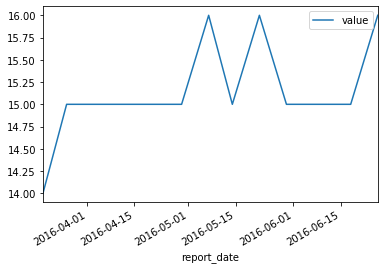

In [393]:
cases.query("data_field_code == 'AR0005' & location == 'Argentina-Catamarca'")[['report_date', 'value']].plot.line('report_date')

# Q1

In [395]:
cases.query("data_field_code == 'AR0005' & location == 'Argentina-Catamarca'")[['value','report_date']]

,value,report_date
16,14,2016-03-19
160,15,2016-03-26
304,15,2016-04-02
448,15,2016-04-09
592,15,2016-04-16
736,15,2016-04-29
880,16,2016-05-07
1024,15,2016-05-14
1168,16,2016-05-22
1312,15,2016-05-30


# Q2

In [396]:
q2t = cases.query("location == 'Argentina-CABA' | location == 'Argentina-Catamarca'").groupby(["location", "report_date"]).sum()

In [397]:
q2t.columns

Index(['value'], dtype='object')

In [398]:
q2t

value
location            report_date       
Argentina-CABA      2016-03-19      78
                    2016-03-26      92
                    2016-04-02      94
                    2016-04-09      97
                    2016-04-16      98
                    2016-04-29     101
                    2016-05-07     255
                    2016-05-14     126
                    2016-05-22     260
                    2016-05-30     132
                    2016-06-06     134
                    2016-06-13     136
                    2016-06-18     136
                    2016-06-26     160
Argentina-Catamarca 2016-03-19      14
                    2016-03-26      15
                    2016-04-02      15
                    2016-04-09      15
                    2016-04-16      15
                    2016-04-29      15
                    2016-05-07      16
                    2016-05-14      15
                    2016-05-22      16
                    2016-05-30      15
                    2016-06-06      15
                    2016-06-13      15
                    2016-06-18      15
                    2016-06-26      16

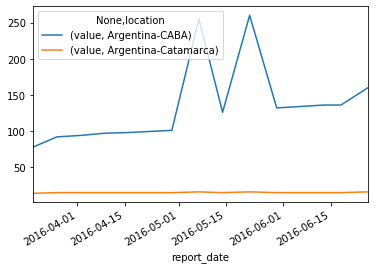

In [399]:
q2t.unstack(level=0).plot()

# Q3 

In [400]:
q3t = cases.query("location == 'Argentina-CABA' | location == 'Argentina-Buenos_Aires' | location == 'Argentina-Catamarca'")

In [401]:
q3t.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


In [402]:
q3t = q3t.groupby("location")

In [403]:
q3t.sum()

,value
location,
Argentina-Buenos_Aires,3279
Argentina-CABA,1899
Argentina-Catamarca,212


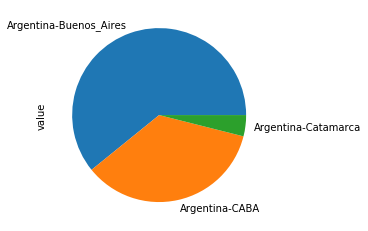

In [404]:
q3t.sum()['value'].plot.pie()

# Q4

In [405]:
wl=[]
with open("Data/1307.1/big.txt", "r") as f:
    filetxt = f.read()
    print(type(filetxt))
    print(len(filetxt))
    
    to_be_removed = "[]()*.,:!\n\"\'#?;-_=|" # all characters to be removed
    
    for c in to_be_removed:
        filetxt = filetxt.replace(c, ' ')
    
    wl = filetxt.split()
    
    #print(filetxt.split("\n")[0].split(" "))
    #for x in filetxt.split("\n"):
    #    for y in x.split(" "):
    #        for z in y.split("."):
    #            wl.append(y)
#    wl = filetxt.split(" ")

<class 'str'>
6488666


In [406]:
len(wl)

1115058

In [407]:
words = pd.DataFrame({"words" : wl})

In [408]:
words["words"].unique()

array(['The', 'Project', 'Gutenberg', ..., '>', 'min', 'i+10'],
      dtype=object)

In [409]:
#"d".isalpha()
words[words['words'].str.isalpha() == False]['words'].value_counts()

1                        349
2                        274
000                      220
3                        189
4                        130
5                        117
6                        109
+                         88
10                        88
7                         74
8                         73
1812                      69
9                         63
11                        55
12                        49
1860                      46
30                        45
15                        44
20                        42
14                        38
13                        38
1865                      37
100                       34
16                        32
1850                      31
28                        29
22                        29
1900                      29
25                        28
17                        28
                        ... 
906                        1
$65                        1
328ff                      1
162ff         

In [410]:
words = words[words['words'].str.isalpha() == True]

In [411]:
words['words'] = words['words'].str.lower()

In [412]:
words = pd.DataFrame({"words" : words["words"].unique()})

In [413]:
words.shape

(29148, 1)

In [414]:
words.query("words == 'global'")

,words
27985,global


In [415]:
import difflib as dl

In [416]:
#function is predicting a word from the given list of words that is closed to the given word
import random
def getNearWord(n):
    w = dl.get_close_matches(n.lower(), words['words'], n=15, cutoff = 0.7)
    if w[0] == n.lower():
        return w[0]
    else:
        return w[random.randint(1,len(w)-1)]

In [419]:
getNearWord("compter")

'copier'